Mask2Former
====

**Masked-attention Mask Transformer for Universal Image Segmentation**

 * Paper: https://arxiv.org/abs/2112.01527

![Mask2Former Overview](../assets/mask2former_overview.png)

In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = AutoImageProcessor.from_pretrained(
    "facebook/mask2former-swin-large-cityscapes-semantic"
)
model = Mask2FormerForUniversalSegmentation.from_pretrained(
    "facebook/mask2former-swin-large-cityscapes-semantic"
)
model.eval().to(device);

/home/pyml/anaconda3/envs/birefnet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/home/pyml/anaconda3/envs/birefnet/lib/python3.10/site-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)


In [ ]:
image_path = "../samples/bicycle.jpg"
image = Image.open(image_path).convert("RGB")

# Preprocess the image and convert it to a tensor
inputs = processor(images=image, return_tensors="pt").to(device)
# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

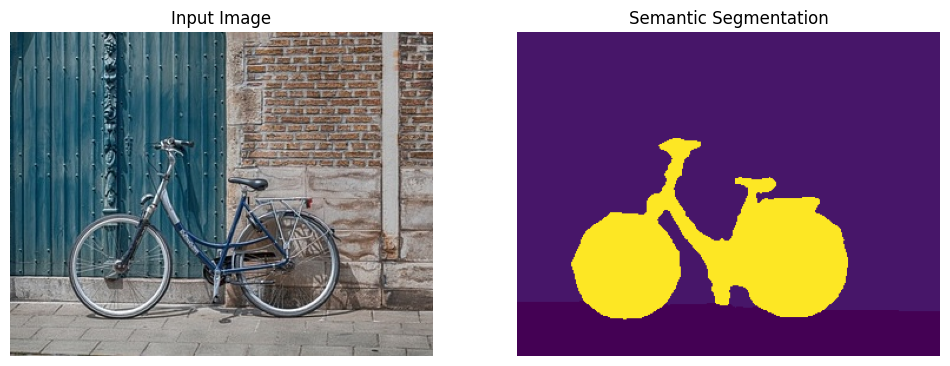

In [6]:
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# you can pass them to processor for postprocessing
semantic_map = processor.post_process_semantic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]

# visualize the semantic map
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(semantic_map.cpu().numpy())
axes[1].set_title("Semantic Segmentation")
axes[1].axis("off")
plt.show()

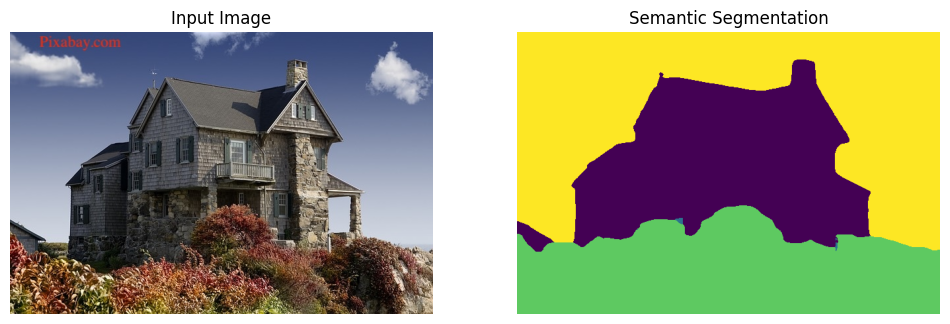

In [10]:
image_path = "../samples/house.jpg"
image = Image.open(image_path).convert("RGB")

# Preprocess the image and convert it to a tensor
inputs = processor(images=image, return_tensors="pt").to(device)
# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# you can pass them to processor for postprocessing
semantic_map = processor.post_process_semantic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]

# visualize the semantic map
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(semantic_map.cpu().numpy())
axes[1].set_title("Semantic Segmentation")
axes[1].axis("off")
plt.show()